In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
import wrangle
from scipy.stats import norm
import statistics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(123)

In [3]:
#1.
df = wrangle.wrangle_zillow()
df = df.rename(columns = {'bedroomcnt': 'bedrooms', 'bathroomcnt': 'bathrooms', 'calculatedfinishedsquarefeet': 'square_feet', 'taxvaluedollarcnt': 'property_value'})
df.head()

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips
4,4,2,3633,296425,2005,6941,6037
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
11,0,0,1200,5328,1972,91,6037
14,0,0,171,6920,1973,255,6037


In [4]:
df.drop(df[df.square_feet > 70000].index, inplace=True)

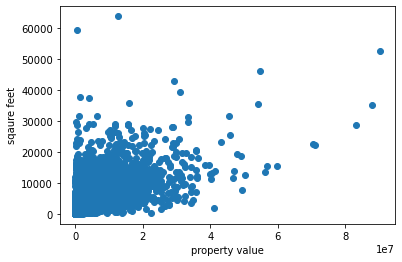

In [34]:
#2.
plt.scatter(df.property_value, df.square_feet)

plt.xlabel('property value')
plt.ylabel('sqaure feet')
plt.show()

In [35]:
baseline = df.square_feet.mean()
baseline

1862.5024719271219

In [36]:
df['baseline'] = baseline

In [37]:
df

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips,baseline
4,4,2,3633,296425,2005,6941,6037,1862.502472
6,3,4,1620,847770,2011,10244,6037,1862.502472
7,3,2,2077,646760,1926,7924,6037,1862.502472
11,0,0,1200,5328,1972,91,6037,1862.502472
14,0,0,171,6920,1973,255,6037,1862.502472
...,...,...,...,...,...,...,...,...
2152856,4,4,4375,422400,2015,13877,6037,1862.502472
2152858,4,3,2262,960756,2015,13494,6059,1862.502472
2152859,4,4,3127,536061,2014,6244,6059,1862.502472
2152861,3,2,1974,424353,2015,5302,6059,1862.502472


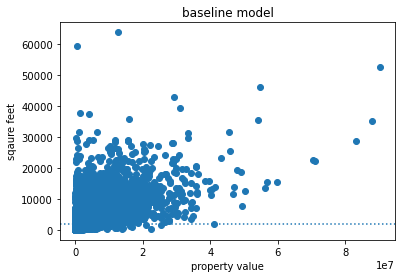

In [38]:
#3.
plt.scatter(df.property_value, df.square_feet)
plt.axhline(baseline, ls=':')

plt.xlabel('property value')
plt.ylabel('sqaure feet')
plt.title('baseline model')
plt.show()

In [40]:
lm = LinearRegression()

# fit the model to trainig data
lm.fit(df[['property_value']], df.square_feet)

# make prediction
# lm.predict will output a numpy array of values,
# we will put those values into a series in df
df['yhat'] = lm.predict(df[['property_value']])

In [41]:
df

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips,baseline,yhat
4,4,2,3633,296425,2005,6941,6037,1862.502472,1719.146244
6,3,4,1620,847770,2011,10244,6037,1862.502472,2200.454294
7,3,2,2077,646760,1926,7924,6037,1862.502472,2024.978446
11,0,0,1200,5328,1972,91,6037,1862.502472,1465.027082
14,0,0,171,6920,1973,255,6037,1862.502472,1466.416851
...,...,...,...,...,...,...,...,...,...
2152856,4,4,4375,422400,2015,13877,6037,1862.502472,1829.118732
2152858,4,3,2262,960756,2015,13494,6059,1862.502472,2299.087765
2152859,4,4,3127,536061,2014,6244,6059,1862.502472,1928.341459
2152861,3,2,1974,424353,2015,5302,6059,1862.502472,1830.823644


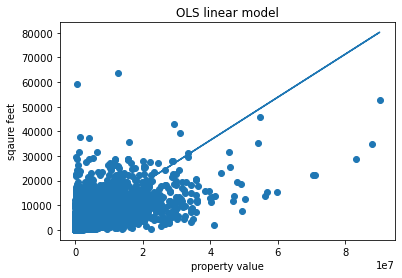

In [43]:
plt.scatter(df.property_value, df.square_feet)

#lineplot is my regression line
plt.plot(df.property_value, df.yhat)

plt.xlabel('property value')
plt.ylabel('sqaure feet')
plt.title('OLS linear model')
plt.show()

In [44]:
df['baseline_residual'] = df.square_feet - df.baseline
df['residual'] = df.square_feet - df.yhat

In [45]:
df

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips,baseline,yhat,baseline_residual,residual
4,4,2,3633,296425,2005,6941,6037,1862.502472,1719.146244,1770.497528,1913.853756
6,3,4,1620,847770,2011,10244,6037,1862.502472,2200.454294,-242.502472,-580.454294
7,3,2,2077,646760,1926,7924,6037,1862.502472,2024.978446,214.497528,52.021554
11,0,0,1200,5328,1972,91,6037,1862.502472,1465.027082,-662.502472,-265.027082
14,0,0,171,6920,1973,255,6037,1862.502472,1466.416851,-1691.502472,-1295.416851
...,...,...,...,...,...,...,...,...,...,...,...
2152856,4,4,4375,422400,2015,13877,6037,1862.502472,1829.118732,2512.497528,2545.881268
2152858,4,3,2262,960756,2015,13494,6059,1862.502472,2299.087765,399.497528,-37.087765
2152859,4,4,3127,536061,2014,6244,6059,1862.502472,1928.341459,1264.497528,1198.658541
2152861,3,2,1974,424353,2015,5302,6059,1862.502472,1830.823644,111.497528,143.176356


In [46]:
#4 & 5.
#baseline residual sum
df.baseline_residual.sum()

2.735760062932968e-08

In [47]:
#osl residual sum
df.residual.sum()

2.2642780095338821e-07

In [48]:
# the difference between yhat and y, just squared
df['baseline_residual_2'] = df.baseline_residual**2
df['residual_2'] = df.residual**2

In [49]:
df

,bedrooms,bathrooms,square_feet,property_value,yearbuilt,taxamount,fips,baseline,yhat,baseline_residual,residual,baseline_residual_2,residual_2
4,4,2,3633,296425,2005,6941,6037,1862.502472,1719.146244,1770.497528,1913.853756,3.134661e+06,3.662836e+06
6,3,4,1620,847770,2011,10244,6037,1862.502472,2200.454294,-242.502472,-580.454294,5.880745e+04,3.369272e+05
7,3,2,2077,646760,1926,7924,6037,1862.502472,2024.978446,214.497528,52.021554,4.600919e+04,2.706242e+03
11,0,0,1200,5328,1972,91,6037,1862.502472,1465.027082,-662.502472,-265.027082,4.389095e+05,7.023935e+04
14,0,0,171,6920,1973,255,6037,1862.502472,1466.416851,-1691.502472,-1295.416851,2.861181e+06,1.678105e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2152856,4,4,4375,422400,2015,13877,6037,1862.502472,1829.118732,2512.497528,2545.881268,6.312644e+06,6.481511e+06
2152858,4,3,2262,960756,2015,13494,6059,1862.502472,2299.087765,399.497528,-37.087765,1.595983e+05,1.375502e+03
2152859,4,4,3127,536061,2014,6244,6059,1862.502472,1928.341459,1264.497528,1198.658541,1.598954e+06,1.436782e+06
2152861,3,2,1974,424353,2015,5302,6059,1862.502472,1830.823644,111.497528,143.176356,1.243170e+04,2.049947e+04


In [50]:
SSE_baseline = df.baseline_residual_2.sum()
SSE = df.residual_2.sum()

In [51]:
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
print('SSE =', "{:.1f}".format(SSE))

SSE Baseline = 2010724888009.2
SSE = 1262830713514.8


In [69]:
# compute explained sum of squares
ESS = sum((df.yhat - df.property_value.mean())**2)

4.504731361730339e+17

In [70]:
TSS = ESS + SSE

4.5047439900374746e+17

In [52]:
#calcaluate MSE
MSE_baseline = SSE_baseline/len(df)
MSE = SSE/len(df)

In [53]:
print(f"MSE baseline = {MSE_baseline:.1f}")
print(f'MSE = {MSE:.1f}')

MSE baseline = 939488.8
MSE = 590043.6


In [54]:
#calculate RMSE
RMSE_baseline = MSE_baseline**.5
RMSE = MSE**.5

In [55]:
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))

RMSE baseline =  969.3
RMSE =  768.1


In [61]:
yhat = df.yhat
y = df.property_value

In [58]:
#6.
def plot_residuals(y, yhat):
    plt.scatter(df.property_value, df.square_feet)

    #lineplot is my regression line
    plt.plot(df.property_value, df.yhat)

    plt.xlabel('property value')
    plt.ylabel('sqaure feet')
    plt.title('OLS linear model')
    plt.show()

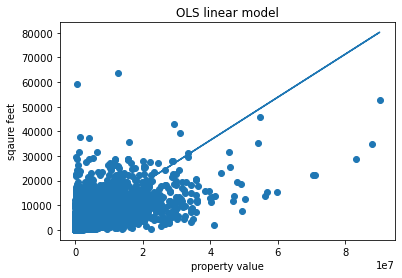

In [62]:
plot_residuals(y, yhat)

In [71]:
def regression_errors(y, yhat):
    SSE = df.residual_2.sum()
    print('SSE =', "{:.1f}".format(SSE))
    
    ESS = sum((df.yhat - df.property_value.mean())**2)
    print('ESS =', "{:.1f}".format(ESS))
    
    TSS = ESS + SSE
    print('TSS =', "{:.1f}".format(TSS))
    
    MSE = SSE/len(df)
    print(f'MSE = {MSE:.1f}')
    
    RMSE = MSE**.5
    print("RMSE = ", "{:.1f}".format(RMSE))

In [72]:
regression_errors(y, yhat)

SSE = 1262830713514.8
ESS = 450473136173033920.0
TSS = 450474399003747456.0
MSE = 590043.6
RMSE =  768.1


In [65]:
def baseline_mean_errors(y, yhat):
    SSE_baseline = df.baseline_residual_2.sum()
    
    print("SSE Baseline =", "{:.1f}".format(SSE_baseline))
    
    MSE_baseline = SSE_baseline/len(df)
    
    print(f"MSE baseline = {MSE_baseline:.1f}")
    
    RMSE_baseline = MSE_baseline**.5
    
    print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

In [66]:
baseline_mean_errors(y, yhat)

SSE Baseline = 2010724888009.2
MSE baseline = 939488.8
RMSE baseline =  969.3


In [75]:
def better_than_baseline(y, yhat):
    if RMSE_baseline > RMSE and SSE_baseline > SSE and MSE_baseline > MSE:
        print("is better than baseline")
    else:
        print("is not better than baseline")

In [76]:
better_than_baseline(y, yhat)

is better than baseline


In [57]:
#7. explained error and unexplained error is the variance

In [ ]:
#8. The model is better than the baseline model